In [85]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from func_visualizations import plotSOM, plotSOMRow
from func_maps import readMaps
from os.path import join
from os import mkdir
import pandas as pd

In [86]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex019'
dirMaps='maps'
dirPlots='plots'
#mkdir(join(dirSOM,nameOfExperiment,dirPlots))
mapsAllKeys=['mapsTrainOnTrain','mapsTestOnTrain','mapsDeimosOnTrain','mapsRunOnTrain',
             'mapsTrainOnRun','mapsTestOnRun','mapsDeimosOnRun','mapsRunOnRun',
             'mapsTrainOnRunBig','mapsTestOnRunBig','mapsDeimosOnRunBig','mapsRunOnRunBig']

In [87]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'

In [88]:
mapsAll={}
for m in mapsAllKeys:
    mapsAll[m]=readMaps(join(dirSOM,nameOfExperiment,dirMaps),m)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Sources\\COSMOS_photoZ\\COSMOS_v3.0\\SOM\\forArticle\\ex019\\maps\\mapsTestOnTrain_activ.txt'

In [27]:
mapsAll['mapsTrainOnTrain'].keys()

dict_keys(['stdMaps', 'meanMaps', 'IDMap', 'activMap'])

In [9]:
from scipy.stats.stats import pearsonr

In [12]:
stdSpecz=np.ndarray.flatten(mapsAll['mapsTrainOnTrain']['stdMaps']['specZ'])
meanResids=np.ndarray.flatten(mapsAll['mapsTrainOnTrain']['meanMaps']['resid_ML'])
np.corrcoef(stdSpecz,meanResids)

array([[ 1.        , -0.16699073],
       [-0.16699073,  1.        ]])

In [38]:
testDataset=pd.read_csv(join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\datasets',
                                    '05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv'))

In [23]:
mapsAll['mapsTrainOnTrain']['stdMaps']['specZ'][eval(testDataset['cellID_TrainSOM'][0])[0]]

(3, 0)

In [66]:

mapsAll['mapsTrainOnTrain']['activMap'][22,10]


16.0

(array([ 17., 116., 130., 146., 101.,  66.,  34.,  35.,  14.,  11.,  12.,
          5.,   3.,   4.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([0.        , 0.02126037, 0.04252075, 0.06378112, 0.08504149,
        0.10630186, 0.12756224, 0.14882261, 0.17008298, 0.19134336,
        0.21260373, 0.2338641 , 0.25512448, 0.27638485, 0.29764522,
        0.31890559, 0.34016597, 0.36142634, 0.38268671, 0.40394709,
        0.42520746]),
 <a list of 20 Patch objects>)

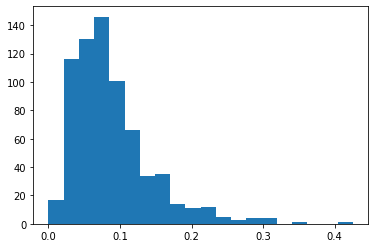

In [76]:
plt.hist(mapsAll['mapsTrainOnTrain']['stdMaps']['specZ'].flatten(),bins=20)

In [83]:
i=6
print(testDataset['cellID_TrainSOM'][i],testDataset['trainMapOccupation'][i])

(5, 7) 40.0


In [84]:
x=5
y=7
print(mapsAll['mapsTrainOnTrain']['activMap'][x,y],mapsAll['mapsTrainOnTrain']['activMap'][-x,y],
      mapsAll['mapsTrainOnTrain']['activMap'][x,-y],mapsAll['mapsTrainOnTrain']['activMap'][-x,-y])
print(mapsAll['mapsTrainOnTrain']['activMap'][y,x],mapsAll['mapsTrainOnTrain']['activMap'][-y,x],
      mapsAll['mapsTrainOnTrain']['activMap'][y,-x],mapsAll['mapsTrainOnTrain']['activMap'][-y,-x])

5.0 27.0 16.0 14.0
14.0 4.0 14.0 13.0
